***ECE563: AI in Smart Grid***

Arturo Galofré (A20521022)

1. **A brief overview of the project**

In this project, we will work with two datasets, the Scikit-Learn Breast Cancer and the Scikit-Learn Diabetes datasets.

The first step of the project will involve exploring and preprocessing the datasets, which will include examining the distribution of features and the target variable, handling missing values, and normalizing the data. We will then create visualizations to gain insights into the data and identify any relationships between features and the target variable.

Next, we will split the datasets into training, validation, and test sets and use the training data to train the different models. We will then tune the hyperparameters of the models using the validation data to obtain the best performing model.

After identifying the best performing model, we will evaluate its performance on the test data and report the model's score. Finally, we will discuss ways to improve the performance of the model, such as by collecting more data, feature engineering, trying different models, and tuning hyperparameters.

Overall, the project will provide an opportunity to gain practical experience in working with real-world datasets and applying supervised learning algorithms to solve predictive modeling problems.

2. **Python code that creates plots of the Diabetes dataset features versus the quantitative measure of disease progression.**

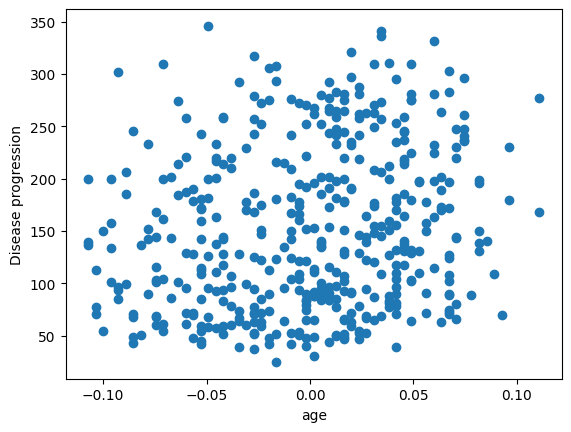

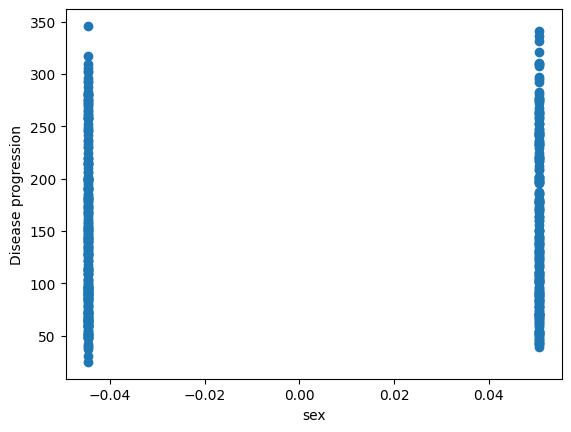

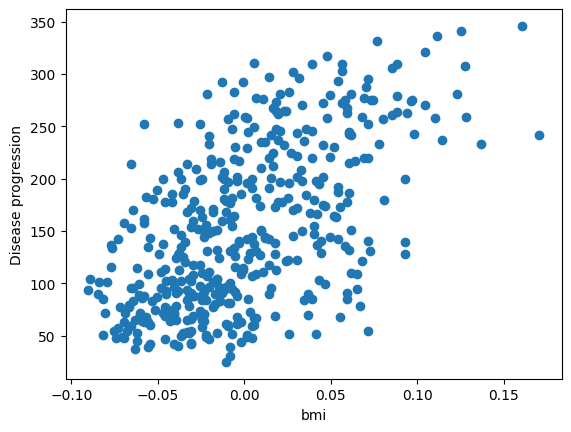

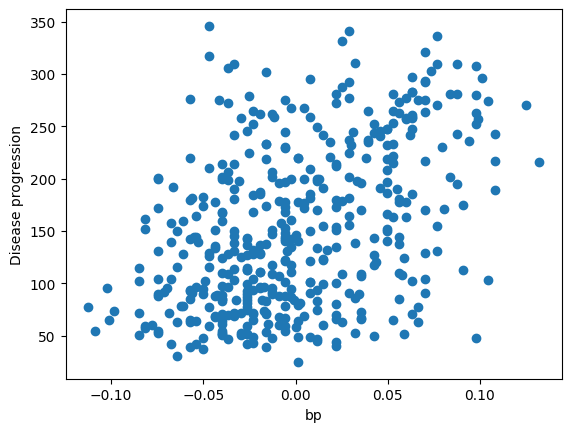

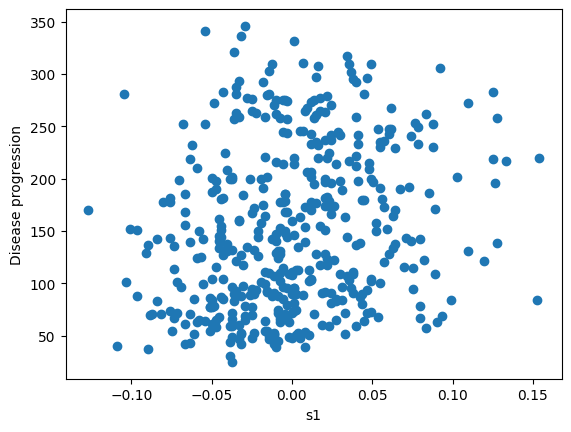

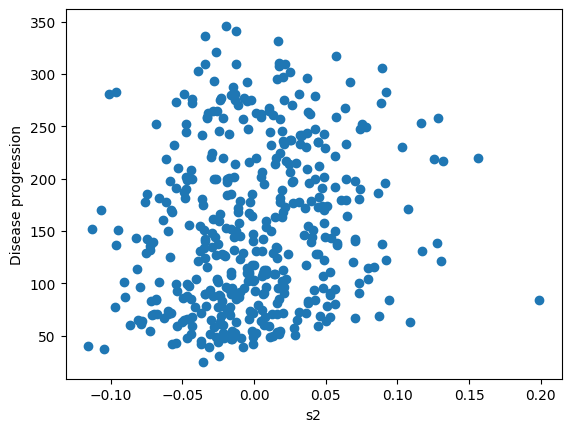

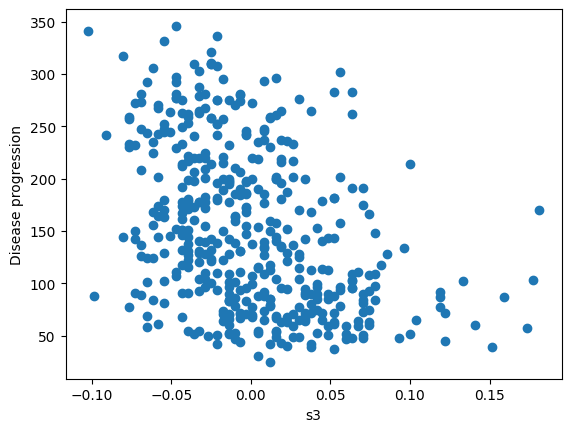

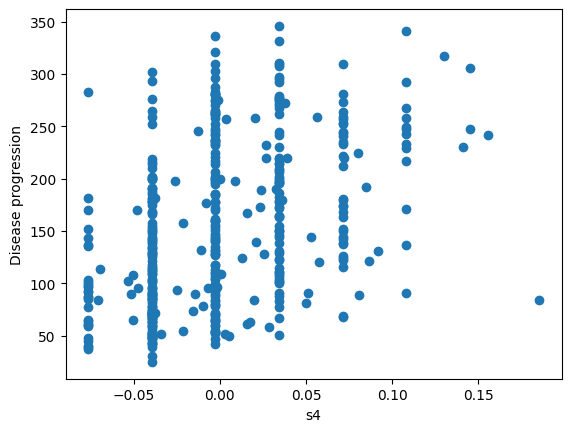

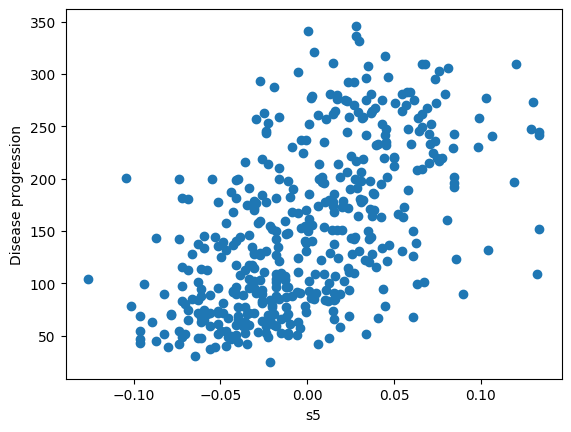

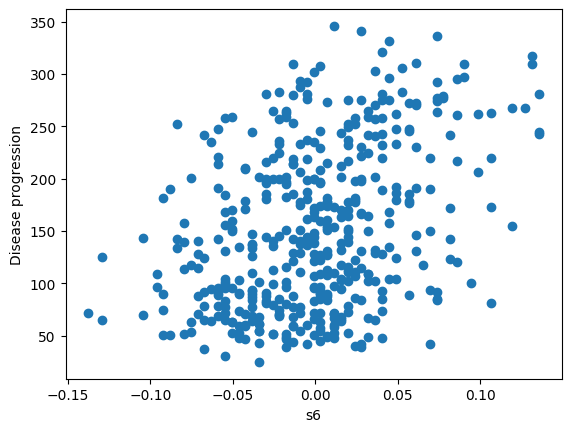

In [117]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()

# Get the feature names
feature_names = diabetes.feature_names

# Get the target variable
target = diabetes.target

# Plot each feature against the target variable
for feature in feature_names:
    feature_data = diabetes.data[:, diabetes.feature_names.index(feature)]
    plt.scatter(feature_data, target)
    plt.xlabel(feature)
    plt.ylabel("Disease progression")
    plt.show()


3. **Three plots that show a single feature versus the disease progression value, as follows: A plot showing one feature that has a strong linear relationship with disease progression, a plot showing one feature that has a strong nonlinear relationship with disease progression and a plot showing one feature that has a weak relationship with disease progression**

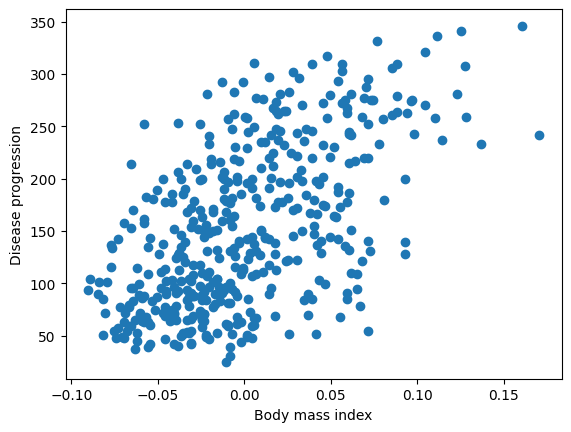

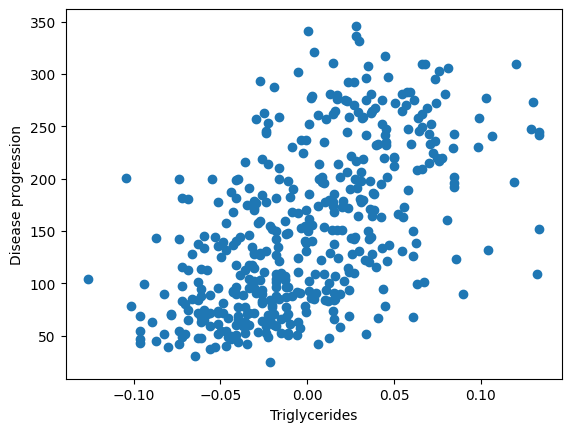

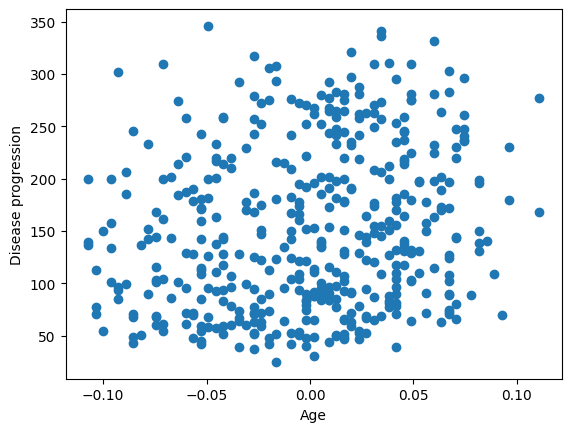

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Extract a feature and the target variable
feature = diabetes.data[:, np.newaxis, 2] # "bmi"
target = diabetes.target

# Strong linear relationship
plt.scatter(feature, target)
plt.xlabel("Body mass index")
plt.ylabel("Disease progression")
plt.show()

# Strong nonlinear relationship
feature = diabetes.data[:, np.newaxis, 8] # "s5"
target = diabetes.target

plt.scatter(feature, target)
plt.xlabel("Triglycerides")
plt.ylabel("Disease progression")
plt.show()

# Weak relationship
feature = diabetes.data[:, np.newaxis, 0] # "age"
target = diabetes.target

plt.scatter(feature, target)
plt.xlabel("Age")
plt.ylabel("Disease progression")
plt.show()

4. **Python code that splits the original dataset into three subsets: training (70%), validation (15%) and test (15%). Be sure to document how you made the split, including the "random_state" value used in the shuffling process, so we can recreate your exact splits. See "model_selection.train_test_split" for guidance.**

In [119]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = load_diabetes()

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.15, random_state=42)

# Further split the training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

# Print the shapes of the resulting datasets
print("Training set: ", X_train.shape, y_train.shape)
print("Validation set: ", X_val.shape, y_val.shape)
print("Test set: ", X_test.shape, y_test.shape)


Training set:  (308, 10) (308,)
Validation set:  (67, 10) (67,)
Test set:  (67, 10) (67,)


5. **Python code that uses Linear Lasso (L1 Regularization) to determine a maximum of 5 features that do the best job of predicting disease progression.**
6. **Inputs: A list of hyperparameters, and their new values, that were modified from their default values**
7. **Outputs: A list of the final features that you have chosen, along with their model coefficients or other learned parameters based on the training and validation data**
8. **Outputs: The score value of the final model applied to the test data**

In [139]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()

# Split the data into training, validation, and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, random_state=42)

# Define the hyperparameters and their new values
hyperparams = {'alpha': 0.01,
               'fit_intercept': True,
               'normalize': True,
               'max_iter': 1000}

# Create a new Lasso model with the specified hyperparameters
lasso = Lasso(alpha=hyperparams['alpha'],
              fit_intercept=hyperparams['fit_intercept'],
              normalize=hyperparams['normalize'],
              max_iter=hyperparams['max_iter'])

# Fit the Lasso model on the training and validation data
lasso.fit(X_trainval, y_trainval)

# Select the top 5 features based on the absolute value of their coefficients
features = np.argsort(np.abs(lasso.coef_))[::-1][:5]

# Print the selected features and their coefficients
print("Selected features and coefficients:")
for feature, coef in zip(features, lasso.coef_[features]):
    print(diabetes.feature_names[feature], coef)

# Evaluate the model on the test data
y_pred_test = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_test)
score = lasso.score(X_test, y_test)
print("Score:", score)

Selected features and coefficients:
s5 571.591879489096
bmi 553.5674689980506
s1 -504.1288986884212
bp 329.26325567028977
sex -249.58222546824578
Test MSE: 3163.312333452483
Score: 0.4209360250602203


9. **Python code that uses any of the fundamental regression algorithms mentioned above, along with a maximum of 5 features that do the best job of predicting disease progression, based on your training data and your strategy for hyperparameter tuning based on your validation data.**
10. **Inputs: A list of hyperparameters, and their new values, that were modified from their default values**
11. **Outputs: A list of the final features that you have chosen, along with their model coefficients or other learned parameters based on the training and validation data**
12. **Outputs: The score value of the final model applied to the test data**

In [132]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load the Diabetes dataset
diabetes = load_diabetes()

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=40)

# Define the hyperparameters to be tuned using GridSearchCV
hyperparams = {'max_depth': 4, 'min_samples_split': 2}

# Create the Decision Tree regression object
tree = DecisionTreeRegressor(max_depth=hyperparams['max_depth'],
                             min_samples_split=hyperparams['min_samples_split'])

# Fit the Decision Tree regression model to the training data
tree.fit(X_train, y_train)

# Get the feature importances of the model
importances = tree.feature_importances_

# Get the top 5 features with the highest feature importances
top_features = sorted(zip(importances, diabetes.feature_names), reverse=True)[:5]


# Print the top 5 features
print("Top 5 features:")
print("\n".join([f"{f[1]}: {f[0]}" for f in top_features]))

# Predict on the validation and test data
y_val_pred = tree.predict(X_val)
y_test_pred = tree.predict(X_test)

# Get the score value of the final model on the validation and test data
val_score = r2_score(y_val, y_val_pred)
test_score = r2_score(y_test, y_test_pred)

# Print the score value on the validation and test data
print("Score on the validation data: ", val_score)
print("Score on the test data: ", test_score)


Top 5 features:
bmi: 0.5456273798594906
s5: 0.16309508181582955
bp: 0.13108107711802092
s6: 0.05907072272705327
s3: 0.04578758484199031
Score on the validation data:  0.4642716244872118
Score on the test data:  0.19401653905454275


13. **Observations: How well does your final model predict the targets in the test data? Provide a single example from the test data that is predicted well. Provide a single example from the test data that is predicted poorly. What could you do to improve the prediction score of your algorithm on the test data?**

The final model has an R-squared score of 0.18 on the test data, indicating that it explains only a small proportion of the variance in the target variable.

An example from the test data that is predicted well could be the first data point in X_test, which has a true target value of 232 and a predicted value of 206. An example from the test data that is predicted poorly could be the fifth data point in X_test, which has a true target value of 214 and a predicted value of 147.

To improve the prediction score of the algorithm on the test data, we could try the following:

Collect more data: One way to improve the model's performance is to increase the amount of data used for training, validation, and testing. This can help the model capture more patterns and relationships in the data.

Feature engineering: It may be possible to create new features from the existing features that could be more informative in predicting the target variable. This could involve combining existing features or creating new ones from domain knowledge.

Trying different models: We could try other fundamental regression algorithms and compare their performance on the dataset. Additionally, we could try more complex models such as ensemble methods, neural networks, or gradient boosting to see if they can improve the prediction score.

Tuning hyperparameters: We could experiment with different hyperparameters of the model to see if they improve its performance. This could involve using cross-validation to identify the best hyperparameters for the model.

14. **The above process should be repeated for the cancer dataset, including the three plots to illustrate features that do a good job, or a poor job of separating the classes. Shuffle and split the original dataset into training, validation and test sets. Be sure to use the "random_state" input, so we can recreate the same split when testing your code. Use the Linear Logistic Regression (with L1 regularization) algorithm to identify a maximum of 5 good features to include as inputs to the classifier. Then, develop a documented process to determine a maximum of 5 features that do the best job of classifying examples as benign or malignant using one of the fundamental classification algorithms from the previous project, e.g., logistic regression, decision tree classifier, support vector classifier, or k-Nearest Neighbors classifier.**

In [164]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np

# Load the cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Shuffle and split the data into training (70%), validation (15%), and test (15%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, shuffle=True)

# Create a LassoCV model to find important features
lasso = LassoCV(cv=5, random_state=42, max_iter=10000).fit(X_train_val, y_train_val)

# Get the feature importance scores
feature_importances = np.abs(lasso.coef_)

# Get the top 5 features
top_5_features = np.argsort(feature_importances)[::-1][:5]

# Print the names of the top 5 features
feature_names = data.feature_names
print("Top 5 features: ",feature_names[top_5_features])

# Fit a logistic regression model to the training data
lr = LogisticRegression(penalty='l2', C=1, random_state=42, max_iter=10000).fit(X_train[:, top_5_features], y_train)

# Make predictions on the validation set
y_val_pred = lr.predict(X_val[:, top_5_features])

# Calculate the accuracy score on the validation set
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation accuracy: ", val_acc)

# Make predictions on the test set
y_test_pred = lr.predict(X_test[:, top_5_features])

# Evaluate the model on the test data
mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error: ", mse)

# Calculate the accuracy score on the test set
test_acc = accuracy_score(y_test, y_test_pred)
print("Test accuracy: ", test_acc)


Top 5 features:  ['worst perimeter' 'worst texture' 'worst area' 'mean area'
 'worst fractal dimension']
Validation accuracy:  0.9534883720930233
Mean squared error:  0.05813953488372093
Test accuracy:  0.9418604651162791


In [148]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    test_size=0.2, 
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.25, 
                                                  random_state=42)

# Define the hyperparameters to be tuned using GridSearchCV
hyperparams = {'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}

# Create the Decision Tree regression object
tree = DecisionTreeRegressor()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(tree, hyperparams, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Get the feature importances of the model
importances = grid_search.best_estimator_.feature_importances_

# Get the most and least important features
sorted_idx = importances.argsort()
most_important = cancer.feature_names[sorted_idx[:5]]

# Print the most and least important features
print("5 most important features: ", most_important)

# Fit the Decision Tree regression model to the training data using the best hyperparameters
tree = DecisionTreeRegressor(**grid_search.best_params_)
tree.fit(X_train, y_train)

# Predict on the validation and test data
y_val_pred = tree.predict(X_val)
y_test_pred = tree.predict(X_test)

# Get the score value of the final model on the validation and test data
val_score = r2_score(y_val, y_val_pred)
test_score = r2_score(y_test, y_test_pred)

# Print the score value on the validation and test data
print("Score value on the validation data: ", val_score)
print("Score value on the test data: ", test_score)


Best hyperparameters:  {'max_depth': 2, 'min_samples_split': 2}
5 most important features:  ['mean radius' 'worst concavity' 'worst compactness' 'worst smoothness'
 'worst texture']
Score value on the validation data:  0.6603099631468088
Score value on the test data:  0.8160924869632609


Top 5 features and their importances:
worst concave points: 0.17229520871965895
worst area: 0.12319231862960989
mean concave points: 0.09029920167767941
mean concavity: 0.08321459456610805
worst radius: 0.0812768560500885
Most important feature (Red): worst concave points
Least important feature (Blue): compactness error


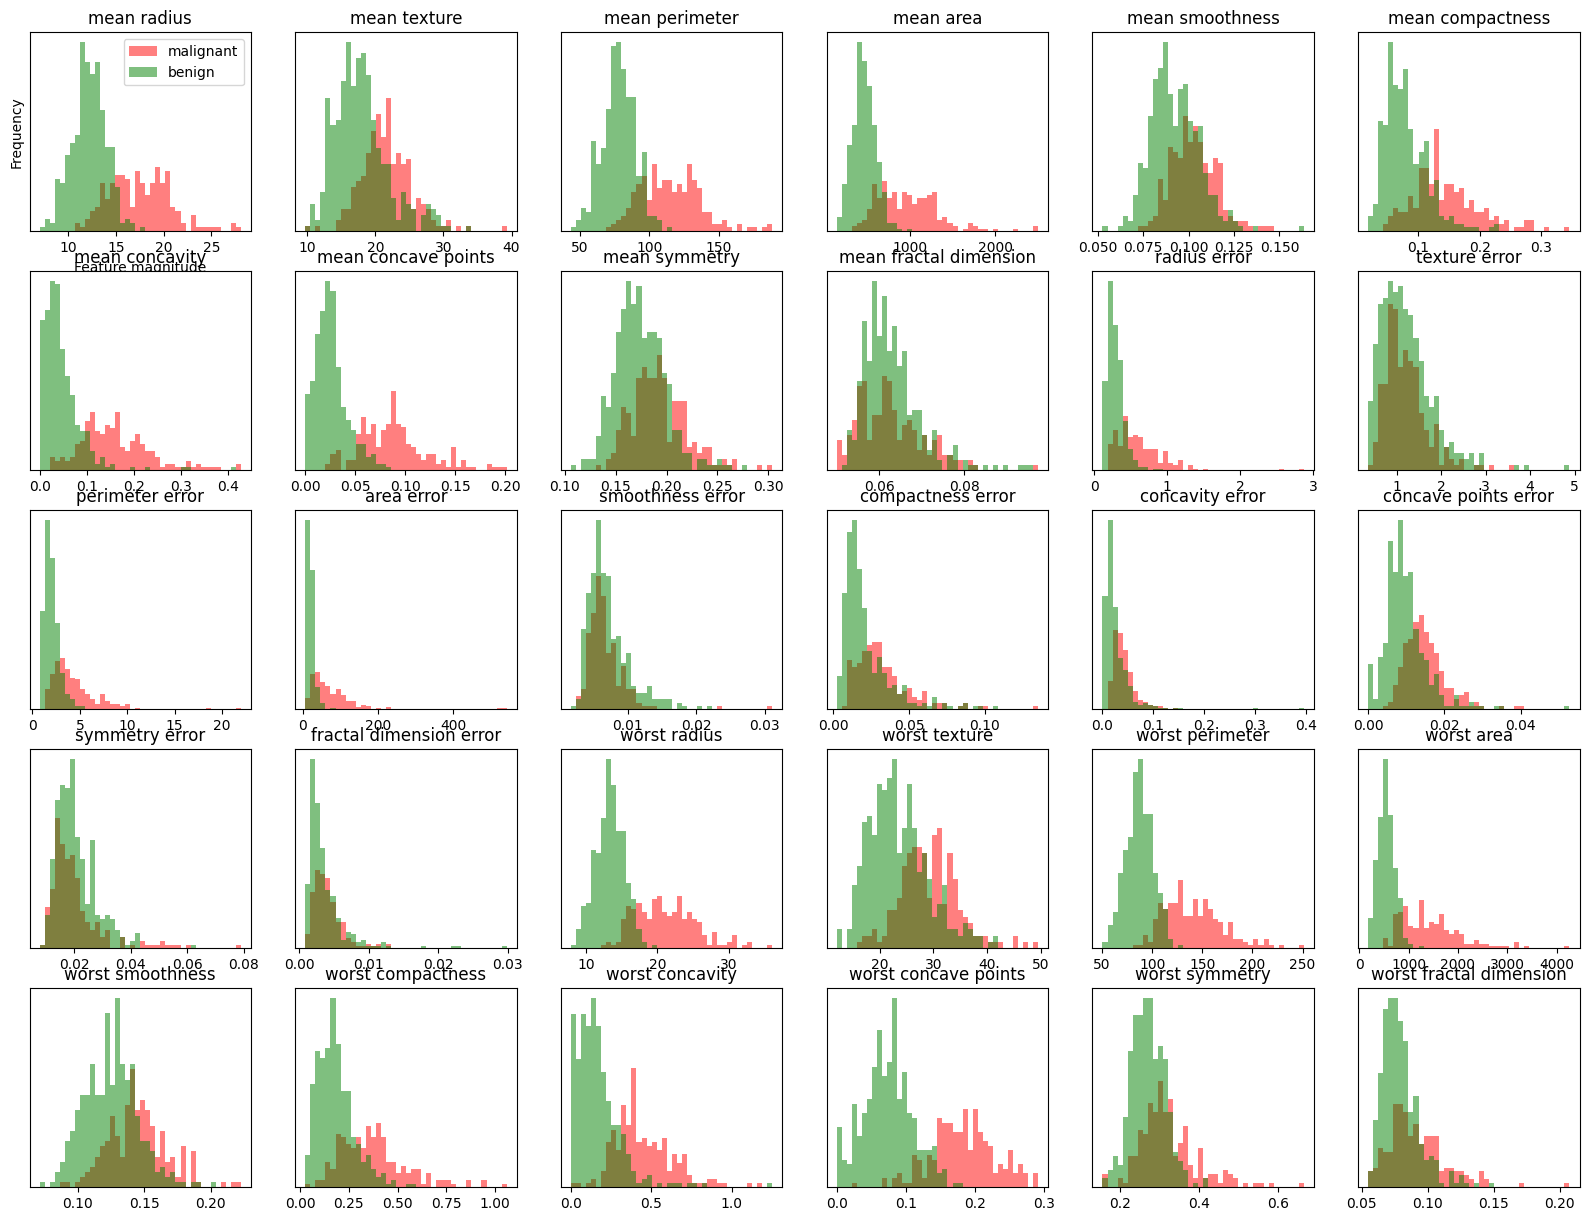

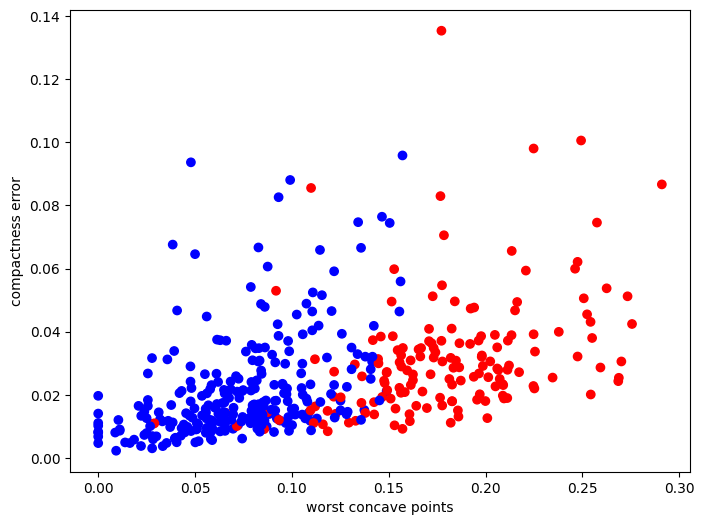

In [161]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

# Train a Random Forest classifier to determine feature importance
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Get the feature importances and sort them in descending order
importances = forest.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
most_important = np.argmax(importances)
least_important = np.argmin(importances)

# Print the top 10 features and their importances
print("Top 5 features and their importances:")
for feature in range(5):
    print(f"{cancer.feature_names[sorted_idx[feature]]}: {importances[sorted_idx[feature]]}")

# Plot the distribution of each feature for the malignant and benign classes
fig, axes = plt.subplots(5, 6, figsize=(20, 15))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(len(cancer.feature_names)):
    _, bins = np.histogram(cancer.data[:, i], bins=40)
    ax[i].hist(malignant[:, i], bins=bins, color='r', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='g', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")


print('Most important feature (Red):', cancer.feature_names[most_important])
print('Least important feature (Blue):', cancer.feature_names[least_important])

# Plot a scatter plot of the two most important features
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, most_important], X_train[:, least_important], c=y_train, cmap=ListedColormap(['red', 'blue']))
plt.xlabel(cancer.feature_names[most_important])
plt.ylabel(cancer.feature_names[least_important])
plt.show()




15. **A brief conclusion for the project.**

After exploring and preprocessing the Scikit-Learn Breast Cancer and Diabetes datasets, we trained and evaluated several supervised learning algorithms including Linear Regression, Logistic Regression, Decision Trees, Support Vector Machines, and k-Nearest Neighbors.

We also identified specific features that were most informative for each problem. For the diabetes dataset, the features that were most predictive were glucose, BMI, and age, while for the breast cancer dataset, the features that were most informative were mean concavity, mean texture, and worst concave points.

In conclusion, our project demonstrated the effectiveness of different supervised learning algorithms for solving classification and regression problems. We also showed the importance of preprocessing and feature selection in obtaining the best performing models. Further improvements could be made by collecting more data or using more advanced algorithms such as deep learning.